<a href="https://colab.research.google.com/github/allenwang0713/tebaml0315/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.datasets import load_diabetes
from urllib.request import urlretrieve
# datas = load_diabetes()
# df = pd.DataFrame(datas["data"],
#           columns=datas["feature_names"])
# df["target"] = datas["target"]
# df
# Y -> 25 ~ 346
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
urlretrieve(url, "diabetes.txt")
df = pd.read_csv("diabetes.txt", encoding="utf-8", sep="\t")
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


pandas API: axis參數特別重要, 因為他決定方向(axis=0/1)

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
x = df.drop("Y", axis=1)
y = df["Y"]
x_np = np.array(x)
y_np = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [8]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

回歸樹根分類樹一樣, 目的: 讓你在回答問題的時候更有信心

  1.分類樹: 選擇一個分支, 讓你的Gini(猜錯機率)越小越好

  2.回歸樹: 選擇一個分支, 讓你的MSE(猜錯機率)(數值分布範圍)越小越好

MSE(每個點和平均的距離平均) = $ \frac{1}{n} \sum (p_i - \mu)^2 $
 


[Text(0.5, 0.8333333333333334, 'S5 <= 4.6\nsquared_error = 5915.454\nsamples = 397\nvalue = 152.736'),
 Text(0.25, 0.5, 'BMI <= 26.95\nsquared_error = 3373.164\nsamples = 199\nvalue = 112.04'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2220.027\nsamples = 155\nvalue = 97.806'),
 Text(0.375, 0.16666666666666666, 'squared_error = 4207.467\nsamples = 44\nvalue = 162.182'),
 Text(0.75, 0.5, 'BMI <= 28.05\nsquared_error = 5133.231\nsamples = 198\nvalue = 193.636'),
 Text(0.625, 0.16666666666666666, 'squared_error = 3928.091\nsamples = 111\nvalue = 164.622'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4226.341\nsamples = 87\nvalue = 230.655')]

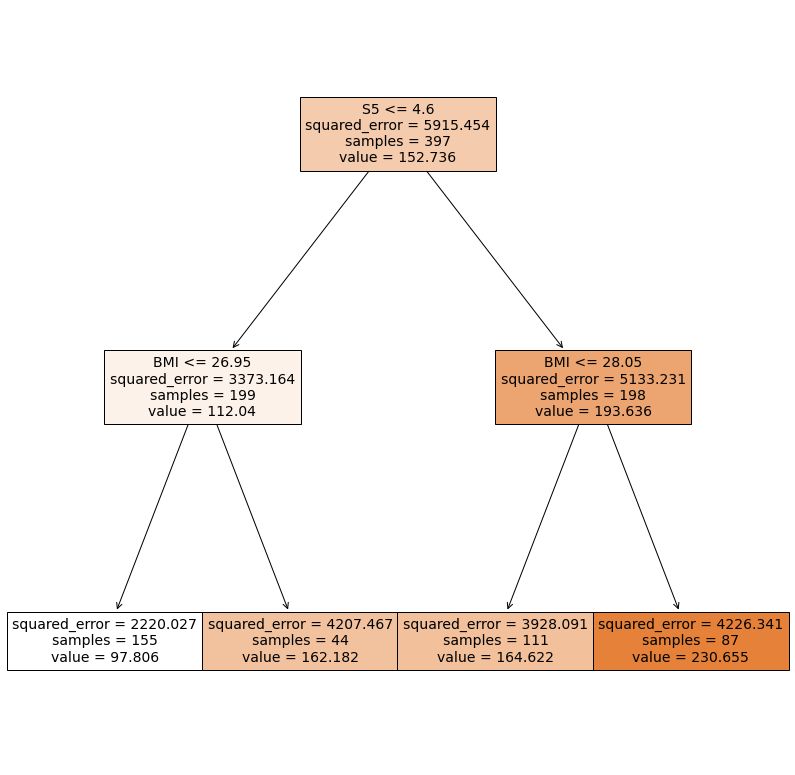

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(reg, 
     feature_names=x.columns, 
     filled=True)

In [10]:
reg.predict(x_test)

array([ 97.80645161, 162.18181818,  97.80645161,  97.80645161,
       164.62162162,  97.80645161, 230.65517241, 164.62162162,
       230.65517241, 164.62162162, 230.65517241, 230.65517241,
        97.80645161, 230.65517241,  97.80645161,  97.80645161,
        97.80645161,  97.80645161, 164.62162162, 164.62162162,
       230.65517241, 164.62162162, 230.65517241, 164.62162162,
       164.62162162, 164.62162162, 164.62162162, 230.65517241,
       164.62162162, 162.18181818, 164.62162162,  97.80645161,
        97.80645161, 162.18181818,  97.80645161,  97.80645161,
       230.65517241, 230.65517241, 230.65517241,  97.80645161,
       230.65517241,  97.80645161,  97.80645161, 230.65517241,
       230.65517241])